# **Import Library**

In [60]:
import keras
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

In [61]:
print(tf.__version__)
print(keras.__version__)

2.18.0
3.6.0


# **Import Dataset**

In [62]:
# Load all dataset to Pandas DataFrame
df_user=pd.read_csv('users-details-2023.csv')
df_anime=pd.read_csv('anime-dataset-2023.csv')
df_score=pd.read_csv('users-score-2023.csv')

In [63]:
# Menampilkan data dan jumlah baris untuk df_user
print("users_data.csv")
display(df_user.sample(3))
print(f"Jumlah data: {len(df_user)}\n")

# Menampilkan data dan jumlah baris untuk df_score
print("anime_rating.csv")
display(df_score.sample(3))
print(f"Jumlah data: {len(df_score)}\n")

# Menampilkan data dan jumlah baris untuk df_anime
print("anime_2023.csv")
display(df_anime.sample(3))
print(f"Jumlah data: {len(df_anime)}")

users_data.csv


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
533723,737323,NoirKamui,Male,NaN,NaN,2011-10-12T00:00:00+00:00,144.2,0.0,12.0,436.0,3.0,53.0,8.0,512.0,0.0,8570.0
294196,352190,Earthling,Male,1991-11-26T00:00:00+00:00,"DK, Hungary",2010-07-07T00:00:00+00:00,1.2,0.0,3.0,7.0,1.0,0.0,0.0,11.0,0.0,70.0
551840,788641,Lejotorrickz16,NaN,NaN,NaN,2011-10-21T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Jumlah data: 731290

anime_rating.csv


,user_id,Username,anime_id,Anime Title,rating
18010116,518665,RoxasHiyuu,934,Higurashi no Naku Koro ni,10
3273249,45359,Makoto_Suki,198,Speed Grapher,8
7430003,292624,Paiguy,190,Love Hina Again,2


Jumlah data: 24325191

anime_2023.csv


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
6784,12673,Papa no Iukoto wo Kikinasai!: Pokkapoka,UNKNOWN,パパのいうことを聞きなさい！ぽっかぽか,7.17,"Comedy, Romance",Unaired episode included in the fifth Blu-ray ...,Special,1.0,"Jul 11, 2012",...,feel.,Light novel,24 min,PG-13 - Teens 13 or older,3202.0,3307,20,22683.0,39672,https://cdn.myanimelist.net/images/anime/12/78...
14703,38250,Xiao Lu He Xiao Lan,Beryl and Sapphire,小绿和小蓝,7.34,"Boys Love, Comedy, Drama, Sci-Fi, Slice of Life","""I've been holding a few words back for a long...",ONA,72.0,"Aug 27, 2018 to Feb 16, 2019",...,Haoliners Animation League,Web manga,12 min per ep,PG-13 - Teens 13 or older,2307.0,6233,93,1827.0,9290,https://cdn.myanimelist.net/images/anime/1670/...
15465,39384,Kogitsune no Koutsuu Anzen,UNKNOWN,こぎつねの交通安全,UNKNOWN,Fantasy,The three kitsune brothers learn about traffic...,OVA,1.0,Sep 1997,...,UNKNOWN,Picture book,16 min,G - All Ages,17389.0,20152,0,UNKNOWN,125,https://cdn.myanimelist.net/images/anime/1242/...


Jumlah data: 24905


In [64]:
# data user details

# Tentukan jumlah total baris yang ingin Anda baca (10%)
total_rows_user = 731290
sample_size_user = int(total_rows_user * 0.06773)

# Membaca hanya 10% dari data
df_user=pd.read_csv('users-details-2023.csv', nrows=sample_size_user)

# Tampilkan informasi mengenai dataframe yang dibaca
print(df_user.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49530 entries, 0 to 49529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mal ID            49530 non-null  int64  
 1   Username          49529 non-null  object 
 2   Gender            23675 non-null  object 
 3   Birthday          17317 non-null  object 
 4   Location          17426 non-null  object 
 5   Joined            49530 non-null  object 
 6   Days Watched      49529 non-null  float64
 7   Mean Score        49529 non-null  float64
 8   Watching          49529 non-null  float64
 9   Completed         49529 non-null  float64
 10  On Hold           49529 non-null  float64
 11  Dropped           49529 non-null  float64
 12  Plan to Watch     49529 non-null  float64
 13  Total Entries     49529 non-null  float64
 14  Rewatched         49529 non-null  float64
 15  Episodes Watched  49529 non-null  float64
dtypes: float64(10), int64(1), object(5)
memo

In [65]:
# Tampilkan baris terakhir dari dataframe
print("Contoh Baris Terakhir, Panjang Dataset:",df_user.shape)

print(df_user.tail(50))

Contoh Baris Terakhir, Panjang Dataset: (49530, 16)
       Mal ID          Username  Gender                   Birthday  \
49480   53924        diannemapa     NaN                        NaN   
49481   53925          hidayuki  Female  1993-01-13T00:00:00+00:00   
49482   53926            saikou  Female                        NaN   
49483   53927           Palance     NaN                        NaN   
49484   53928           dnbdave    Male  1980-02-08T00:00:00+00:00   
49485   53929          kaito798     NaN                        NaN   
49486   53930        Eric_Gross     NaN                        NaN   
49487   53931          kanasaki     NaN                        NaN   
49488   53932           FuunoKi    Male  1987-11-10T00:00:00+00:00   
49489   53933        samarecarm  Female  1970-01-01T00:00:00+00:00   
49490   53934      maxter112233     NaN  1989-04-30T00:00:00+00:00   
49491   53935  shingamiassassin     NaN                        NaN   
49492   53936          SamuraiJ     Na

In [66]:
# data user score rating

# Tentukan jumlah total baris yang ingin Anda baca (10%)
total_rows_score = 24325191
sample_size_score = int(total_rows_score * 0.15)

# Membaca hanya 10% dari data
df_score = pd.read_csv('users-score-2023.csv', nrows=sample_size_score)

# Tampilkan informasi mengenai dataframe yang dibaca
print(df_score.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648778 entries, 0 to 3648777
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 139.2+ MB
None


In [67]:
# Tampilkan baris terakhir dari dataframe
print("Contoh Baris Terakhir, Panjang Dataset:",df_score.shape)

print(df_score.tail(10))

Contoh Baris Terakhir, Panjang Dataset: (3648778, 5)
         user_id    Username  anime_id  \
3648768    53946  BloodyDead       164   
3648769    53946  BloodyDead        19   
3648770    53946  BloodyDead       838   
3648771    53946  BloodyDead        20   
3648772    53946  BloodyDead       442   
3648773    53946  BloodyDead       936   
3648774    53946  BloodyDead      1074   
3648775    53946  BloodyDead       761   
3648776    53946  BloodyDead      4134   
3648777    53946  BloodyDead      2472   

                                               Anime Title  rating  
3648768                                      Mononoke Hime      10  
3648769                                            Monster       9  
3648770           Narutaru: Mukuro Naru Hoshi Tama Taru Ko       7  
3648771                                             Naruto       8  
3648772  Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...       6  
3648773  Naruto Movie 2: Dai Gekitotsu! Maboroshi no Ch...       6  
3

In [68]:
# Data Final

# Menampilkan data dan jumlah baris untuk df_user
print("users_data.csv")
display(df_user.sample(3))
print(f"Jumlah data: {len(df_user)}\n")

# Menampilkan data dan jumlah baris untuk df_score
print("anime_rating.csv")
display(df_score.sample(3))
print(f"Jumlah data: {len(df_score)}\n")

# Menampilkan data dan jumlah baris untuk df_anime
print("anime_2023.csv")
display(df_anime.sample(3))
print(f"Jumlah data: {len(df_anime)}")

users_data.csv


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
24103,25506,Darude,Male,1989-03-29T00:00:00+00:00,WEST VAN - THE 6o4 -,2007-12-10T00:00:00+00:00,141.6,10.00,34.0,506.0,0.0,1.0,320.0,861.0,0.0,8433.0
8954,10127,bryon257,Male,NaN,"Phoenix, Arizona",2007-08-13T00:00:00+00:00,107.3,7.95,8.0,211.0,80.0,24.0,73.0,396.0,74.0,6452.0
4003,5105,Nevyn,Female,1980-12-19T00:00:00+00:00,NaN,2007-06-02T00:00:00+00:00,159.9,8.23,7.0,433.0,8.0,14.0,10.0,472.0,0.0,9294.0


Jumlah data: 49530

anime_rating.csv


,user_id,Username,anime_id,Anime Title,rating
407460,4919,KiddWolf,67,Basilisk: Kouga Ninpou Chou,9
3597146,53277,Kaiken,4898,Kuroshitsuji,8
2028507,26995,asterixk,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,9


Jumlah data: 3648778

anime_2023.csv


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
21413,49644,We Are Us,We Are Us,We Are Us,5.49,UNKNOWN,We Are Us is Synthesizer Laboratory's first si...,Music,1.0,"Jan 17, 2021",...,UNKNOWN,Original,2 min,G - All Ages,UNKNOWN,18966,0,107.0,194,https://cdn.myanimelist.net/images/anime/1015/...
14972,38714,Gundam: G no Reconguista Movie I - Ike! Core F...,Gundam Reconguista in G I: Go! Core Fighter,劇場版 ガンダム Gのレコンギスタ I 行け！コア・ファイター,6.72,"Action, Sci-Fi",The first summary movie of the Gundam: G no Re...,Movie,1.0,"Nov 29, 2019",...,Sunrise,Original,1 hr 30 min,PG-13 - Teens 13 or older,5218.0,8834,1,1031.0,3726,https://cdn.myanimelist.net/images/anime/1016/...
14521,37981,Kaijuu no Kodomo,Children of the Sea,海獣の子供,7.2,"Award Winning, Drama, Mystery, Supernatural",Ruka Azumi's ordinary summer vacation revolves...,Movie,1.0,"Jun 7, 2019",...,Studio 4°C,Manga,1 hr 51 min,PG-13 - Teens 13 or older,3025.0,1904,793,33805.0,102019,https://cdn.myanimelist.net/images/anime/1103/...


Jumlah data: 24905


# **Data Assessment**


## **`df_user`**

In [69]:
df_user.sample(5)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
27120,28567,mizuhashi,NaN,NaN,NaN,2007-12-30T00:00:00+00:00,144.8,8.20,2.0,3.0,0.0,0.0,0.0,5.0,34.0,8690.0
13082,14304,PlanetStruck,Female,NaN,NaN,2007-09-20T00:00:00+00:00,3.2,7.92,7.0,10.0,0.0,1.0,3.0,21.0,0.0,185.0
24212,25615,Mikami_Teru,NaN,NaN,NaN,2007-12-10T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11010,12207,XANA,NaN,NaN,NaN,2007-09-04T00:00:00+00:00,14.0,8.67,1.0,2.0,0.0,0.0,0.0,3.0,5.0,839.0
26749,28193,JRR1285,NaN,NaN,NaN,2007-12-28T00:00:00+00:00,2.6,9.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,154.0


In [70]:
# View variable information in users data
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49530 entries, 0 to 49529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mal ID            49530 non-null  int64  
 1   Username          49529 non-null  object 
 2   Gender            23675 non-null  object 
 3   Birthday          17317 non-null  object 
 4   Location          17426 non-null  object 
 5   Joined            49530 non-null  object 
 6   Days Watched      49529 non-null  float64
 7   Mean Score        49529 non-null  float64
 8   Watching          49529 non-null  float64
 9   Completed         49529 non-null  float64
 10  On Hold           49529 non-null  float64
 11  Dropped           49529 non-null  float64
 12  Plan to Watch     49529 non-null  float64
 13  Total Entries     49529 non-null  float64
 14  Rewatched         49529 non-null  float64
 15  Episodes Watched  49529 non-null  float64
dtypes: float64(10), int64(1), object(5)
memo

In [71]:
# View the number of unique data in each users data variable
print("Number of unique data:")
print(df_user.nunique())

Number of unique data:
Mal ID              49530
Username            49529
Gender                  3
Birthday             5594
Location             8428
Joined                736
Days Watched         3112
Mean Score            569
Watching              303
Completed            1503
On Hold               266
Dropped               376
Plan to Watch         723
Total Entries        1856
Rewatched             375
Episodes Watched    10290
dtype: int64


In [72]:
# See the number of empty data in each users data variable
print("Number of empty data:")
print(df_user.isna().sum())

Number of empty data:
Mal ID                  0
Username                1
Gender              25855
Birthday            32213
Location            32104
Joined                  0
Days Watched            1
Mean Score              1
Watching                1
Completed               1
On Hold                 1
Dropped                 1
Plan to Watch           1
Total Entries           1
Rewatched               1
Episodes Watched        1
dtype: int64


In [73]:
# View the number of duplicate data in each row of seller data
print("Number of duplicate rows:", end=" ")
print(df_user.duplicated().sum())

Number of duplicate rows: 0


In [74]:
# View descriptive parameter data from each numeric variable of seller data
df_user.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,49530.000000,49529.000000,49529.000000,49529.000000,49529.000000,49529.000000,49529.000000,49529.000000,49529.000000,49529.000000,4.952900e+04
mean,26270.066687,40.216009,5.649732,8.259060,113.514345,7.188960,9.800440,26.468170,165.231077,9.574108,2.634207e+03
std,14713.387291,69.225757,3.744209,31.357223,258.585620,38.197249,39.009912,102.440069,351.309563,39.884409,1.178375e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,13593.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
50%,26178.500000,13.000000,7.490000,2.000000,20.000000,0.000000,0.000000,1.000000,32.000000,0.000000,7.780000e+02
75%,38724.750000,52.100000,8.300000,7.000000,117.000000,5.000000,5.000000,15.000000,179.000000,4.000000,3.141000e+03
max,53974.000000,2410.700000,10.000000,2934.000000,7893.000000,5167.000000,2522.000000,6440.000000,10178.000000,3498.000000,1.778924e+06


## **`df_anime`**

In [75]:
df_anime.sample(3)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
24581,55342,Mannequin,Mannequin,マネキン,UNKNOWN,Romance,Music video for the song ' Mannequin by DECO*2...,Music,1.0,"Mar 9, 2023",...,OTOIRO,Original,3 min,PG-13 - Teens 13 or older,UNKNOWN,20484,0,UNKNOWN,106,https://cdn.myanimelist.net/images/anime/1546/...
6768,12591,Ojamajo Doremi OVA,UNKNOWN,"おジャ魔女どれみの交通安全, おジャ魔女どれみの自転車安全教室",6.63,Comedy,Traffic Safety: Onpu teaches traffic safety.\n...,OVA,3.0,2001 to 2002,...,Toei Animation,Unknown,13 min per ep,G - All Ages,5698.0,10580,4,538.0,2060,https://cdn.myanimelist.net/images/anime/1327/...
6626,11857,Judo Sanka,UNKNOWN,柔道讃歌,UNKNOWN,Sports,Based on Hiroshi Kaizuka's manga.\n\nThe last ...,TV,27.0,"Apr 1, 1974 to Sep 30, 1974",...,UNKNOWN,Unknown,24 min per ep,G - All Ages,16988.0,14059,1,UNKNOWN,639,https://cdn.myanimelist.net/images/anime/1554/...


In [76]:
# View variable information in tourism data
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [77]:
# View the number of unique data in each tourism data variable
print("Number of unique data:")
print(df_anime.nunique())

Number of unique data:
anime_id        24905
Name            24901
English name    10134
Other name      23796
Score             567
Genres           1006
Synopsis        20113
Type                7
Episodes          252
Aired           15213
Premiered         244
Status              3
Producers        4423
Licensors         265
Studios          1547
Source             17
Duration          331
Rating              7
Rank            15198
Popularity      18363
Favorites        1814
Scored By        8281
Members         10996
Image URL       24720
dtype: int64


In [78]:
# See the number of empty data in each tourism data variable
print("Number of empty data:")
print(df_anime.isna().sum())

Number of empty data:
anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64


In [79]:
# View the number of duplicate data in each row of tourism data
print("Number of duplicate rows:", end=" ")
print(df_anime.duplicated().sum())

Number of duplicate rows: 0


In [80]:
# View all unique genres
genres_set = set()
for data in df_anime['Genres'].tolist():
  genres = data.split(', ')
  for genre in genres:
    genres_set.add(genre)

print(f'Number of genres: {len(genres_set)}')
for index, data in enumerate(genres_set):
  print(index, data)

Number of genres: 22
0 Supernatural
1 Award Winning
2 Boys Love
3 Drama
4 Adventure
5 Avant Garde
6 Gourmet
7 Ecchi
8 Sci-Fi
9 Romance
10 Girls Love
11 Sports
12 Horror
13 UNKNOWN
14 Hentai
15 Comedy
16 Suspense
17 Mystery
18 Erotica
19 Action
20 Fantasy
21 Slice of Life


In [81]:
# View descriptive parameter data of each numeric variable of customer data
df_anime.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


## **`df_score`**

In [82]:
df_score.sample(3)

,user_id,Username,anime_id,Anime Title,rating
1675719,22304,XorceR,18745,Chihayafuru 2: Waga Miyo ni Furu Nagame Shima ni,7
3520592,50968,DarknessFall,10793,Guilty Crown,8
3134313,43245,decaibro,448,Tenjou Tenge: The Ultimate Fight,10


In [83]:
# View variable information in rating data
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648778 entries, 0 to 3648777
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 139.2+ MB


In [84]:
# View the number of unique data in each rating data variable
print("Number of unique data:")
print(df_score.nunique())

Number of unique data:


user_id        33538
Username       33537
anime_id       13436
Anime Title    13433
rating            10
dtype: int64


In [85]:
# See the number of empty data in each rating data variable
print("Number of empty data:")
print(df_score.isna().sum())

Number of empty data:
user_id          0
Username       232
anime_id         0
Anime Title      0
rating           0
dtype: int64


In [86]:
# View the number of duplicate data in each row of rating data
print("Number of duplicate rows:", end=" ")
print(df_score.duplicated().sum())

Number of duplicate rows: 0


In [87]:
# View descriptive parameter data of each numeric variable of rating data
df_score.describe()

,user_id,anime_id,rating
count,3.648778e+06,3.648778e+06,3.648778e+06
mean,2.464311e+04,7.048942e+03,7.501269e+00
std,1.501943e+04,1.111816e+04,1.654762e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.117700e+04,4.450000e+02,7.000000e+00
50%,2.424700e+04,1.818000e+03,8.000000e+00
75%,3.710900e+04,7.711000e+03,9.000000e+00
max,5.394600e+04,5.568800e+04,1.000000e+01


# **Data Cleaning**

## **`df_user`**

In [88]:
# Only keep necessary columns
df_user = df_user[['Mal ID', 'Username']].copy()
df_user.head(3)

,Mal ID,Username
0,1,Xinil
1,3,Aokaado
2,4,Crystal


## **`df_anime`**

In [89]:
# Mengambil kolom yang relevan untuk anime termasuk Producers dan Studios
columns_anime = ['anime_id', 'Name', 'Genres', 'Score', 'Status', 'Favorites']
df_anime = df_anime[columns_anime].copy()
df_anime.head(3)

,anime_id,Name,Genres,Score,Status,Favorites
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,Finished Airing,78525
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",8.38,Finished Airing,1448
2,6,Trigun,"Action, Adventure, Sci-Fi",8.22,Finished Airing,15035


In [90]:
# Convert Rating columns with commas to proper float format
df_anime['Score'] = df_anime['Score'].replace('UNKNOWN', np.nan)
df_anime['Score'] = df_anime['Score'].replace(',', '.', regex=True)
df_anime['Score'] = df_anime['Score'].astype(dtype='float32')
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anime_id   24905 non-null  int64  
 1   Name       24905 non-null  object 
 2   Genres     24905 non-null  object 
 3   Score      15692 non-null  float32
 4   Status     24905 non-null  object 
 5   Favorites  24905 non-null  int64  
dtypes: float32(1), int64(2), object(3)
memory usage: 1.0+ MB


In [91]:
# Fill missing Time_Minutes with the median
# df_anime.fillna({'Time_Minutes': df_anime['Time_Minutes'].median()}, inplace=True)

## **`df_score`**

In [92]:
# Only keep necessary columns
df_score = df_score[['user_id', 'anime_id', 'rating']].copy()
df_score.head(3)

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5


In [93]:
# Mengoptimalkan tipe data kolom di df_score
df_score['user_id'] = df_score['user_id'].astype('int32')  # Ubah menjadi int32
df_score['rating'] = df_score['rating'].astype('float32')    # Ubah menjadi float32

# Jika ada kolom ID yang sangat besar, gunakan 'int16' jika memungkinkan
# Misalnya, jika User_Id memiliki rentang ID yang lebih kecil
df_score['user_id'] = df_score['user_id'].astype('int16')

# Cek penggunaan memori setelah perubahan
print(df_score.memory_usage(deep=True))


Index            132
user_id      7297556
anime_id    29190224
rating      14595112
dtype: int64


In [94]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648778 entries, 0 to 3648777
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int16  
 1   anime_id  int64  
 2   rating    float32
dtypes: float32(1), int16(1), int64(1)
memory usage: 48.7 MB


# **Explanatory Data Analysis**

## **`df_user`**

In [95]:
# # View the distribution of user based on age
# users_age_df = pd.DataFrame(df_user.groupby(by='Age')['User_Id'].nunique())
# users_age_df.reset_index(inplace=True)
# users_age_df.rename(columns={'User_Id': 'Count'}, inplace=True)

# # Visualize the distribution of user based on age
# sns.barplot(x='Age', y='Count', data=users_age_df.sort_values(by='Age', ascending=True))
# plt.title('Users by Age', loc='center', fontsize=10)
# plt.show()

## **`df_anime`**

In [96]:
# # View the distribution of numeric values
# df_anime[['Price', 'Rating', 'Time_Minutes']].hist(figsize=(10, 6))

In [97]:
# # View the distribution of tourism spots based on city
# tourism_city_df = pd.DataFrame(df_anime.groupby(by='City')['Place_Id'].nunique())
# tourism_city_df.reset_index(inplace=True)
# tourism_city_df.rename(columns={'Place_Id': 'Count'}, inplace=True)

# # Visualize the distribution of tourism spots based on city
# sns.barplot(x="City", y="Count", data=tourism_city_df.sort_values(by="Count", ascending=False))
# plt.title("Tourism Spots by City", loc="center", fontsize=10)
# plt.show()

In [98]:
# # View the distribution of tourism spots based on category
# tourism_category_df = df_anime.copy()
# tourism_category_df['Category'] = tourism_category_df['Category'].str.split(', ')
# tourism_category_df = tourism_category_df.explode('Category').groupby('Category').size().reset_index(name='Count')

# # Visualize the distribution of tourism spots based on category
# sns.barplot(x="Category", y="Count", data=tourism_category_df.sort_values(by="Count", ascending=False))
# plt.title("Tourism Spots by Category (Split)", loc="center", fontsize=10)
# plt.xticks(rotation=45)
# plt.show()

## **`df_score`**

In [99]:
# # View the distribution of user ratings
# plt.figure(figsize=(6, 4))
# plt.hist(rating_df['Place_Ratings'])
# plt.title("Distribution of Ratings")
# plt.show()

# **Data Transformation**

## **Create `anime_one_hot_df`**

In [100]:
def get_one_hot_anime_data(df_anime: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Preprocess the anime dataframe by applying one-hot encoding to 'Genres' and 'Status',
    and dropping irrelevant columns.

    Args:
        df_anime (pd.DataFrame): Original anime dataframe.

    Returns:
        pd.DataFrame: Processed anime dataframe with one-hot encoding applied.
    """
    # One-hot encoding untuk Genres dan Status columns
    genres_one_hot = df_anime['Genres'].str.get_dummies(sep=', ')
    status_one_hot = df_anime['Status'].str.get_dummies()

    # Merge the original dataframe with the one-hot encoding result
    new_df_anime = pd.concat([df_anime, status_one_hot, genres_one_hot], axis=1)

    # Drop irrelevant columns
    anime_one_hot_df = new_df_anime.drop(columns=['Name', 'Genres', 'Status'])
    
    # Fill NaN values dengan 0 (di dalam fungsi)
    anime_one_hot_df = anime_one_hot_df.fillna(0)
    
    return anime_one_hot_df, new_df_anime



In [101]:
# Create anime_one_hot_df
anime_one_hot_df, new_df_anime = get_one_hot_anime_data(df_anime)
display(anime_one_hot_df)
display(anime_one_hot_df.info())

,anime_id,Score,Favorites,Currently Airing,Finished Airing,Not yet aired,Action,Adventure,Avant Garde,Award Winning,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1,8.75,78525,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,5,8.38,1448,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,6,8.22,15035,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7,7.25,613,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,8,6.94,14,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,0.00,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24901,55732,0.00,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24902,55733,0.00,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
24903,55734,0.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24905 non-null  int64  
 1   Score             24905 non-null  float32
 2   Favorites         24905 non-null  int64  
 3   Currently Airing  24905 non-null  int64  
 4   Finished Airing   24905 non-null  int64  
 5   Not yet aired     24905 non-null  int64  
 6   Action            24905 non-null  int64  
 7   Adventure         24905 non-null  int64  
 8   Avant Garde       24905 non-null  int64  
 9   Award Winning     24905 non-null  int64  
 10  Boys Love         24905 non-null  int64  
 11  Comedy            24905 non-null  int64  
 12  Drama             24905 non-null  int64  
 13  Ecchi             24905 non-null  int64  
 14  Erotica           24905 non-null  int64  
 15  Fantasy           24905 non-null  int64  
 16  Girls Love        24905 non-null  int64 

None

In [102]:
# Pastikan 'Score' tidak memiliki NaN
print("NaN in Score column:", anime_one_hot_df['Score'].isna().sum())

# Jika masih ada NaN, isi secara eksplisit
if anime_one_hot_df['Score'].isna().sum() > 0:
    anime_one_hot_df['Score'] = anime_one_hot_df['Score'].fillna(0)
    print("After explicit filling, NaN in Score column:", anime_one_hot_df['Score'].isna().sum())

# Cek info untuk memastikan
print(anime_one_hot_df.info())

NaN in Score column: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24905 non-null  int64  
 1   Score             24905 non-null  float32
 2   Favorites         24905 non-null  int64  
 3   Currently Airing  24905 non-null  int64  
 4   Finished Airing   24905 non-null  int64  
 5   Not yet aired     24905 non-null  int64  
 6   Action            24905 non-null  int64  
 7   Adventure         24905 non-null  int64  
 8   Avant Garde       24905 non-null  int64  
 9   Award Winning     24905 non-null  int64  
 10  Boys Love         24905 non-null  int64  
 11  Comedy            24905 non-null  int64  
 12  Drama             24905 non-null  int64  
 13  Ecchi             24905 non-null  int64  
 14  Erotica           24905 non-null  int64  
 15  Fantasy           24905 non-null  int64  
 16  Girls Love       

In [103]:
new_df_anime.head(3)

,anime_id,Name,Genres,Score,Status,Favorites,Currently Airing,Finished Airing,Not yet aired,Action,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,Finished Airing,78525,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",8.38,Finished Airing,1448,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,6,Trigun,"Action, Adventure, Sci-Fi",8.22,Finished Airing,15035,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Save for testing
np.save('anime_vector.npy', anime_one_hot_df.to_numpy()[:, 1:])

## **Create `average_user_df_score`**

In [105]:
def get_average_user_rating(new_df_anime: pd.DataFrame, df_score: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the average user ratings for anime genres.

    This function preprocesses the anime and rating dataframes to calculate
    the average ratings given by each user for various anime genres.

    Args:
        new_df_anime (pd.DataFrame): Dataframe containing anime information. 
            It must include an 'anime_id' column and one-hot encoded columns for anime genres.
        df_score (pd.DataFrame): Dataframe containing user ratings for anime with columns 
            'anime_id', 'User_Id', and 'Score'.

    Returns:
        pd.DataFrame: A dataframe with average user ratings for each anime genre. The resulting 
            dataframe includes:
                - 'User_Id': Unique identifier for users.
                - Columns corresponding to anime genres with average ratings for each user.
    """
    # Genre list (22 genres)
    genres = [
        'Adventure', 'Drama', 'Sports', 'Award Winning', 'Comedy', 'UNKNOWN', 'Mystery',
        'Ecchi', 'Horror', 'Gourmet', 'Erotica', 'Suspense', 'Avant Garde', 'Sci-Fi',
        'Action', 'Fantasy', 'Hentai', 'Supernatural', 'Girls Love', 'Romance', 'Boys Love',
        'Slice of Life'
    ]

    # Drop unnecessary columns from new_df_anime
    anime_genre_only_one_hot_df = new_df_anime.drop(columns=[
        'Name', 'Genres', 'Status'
    ])

    # Merge df_score with anime_genre_only_one_hot_df based on 'anime_id'
    rating_one_hot_df = df_score.merge(
        anime_genre_only_one_hot_df, how='inner', on='anime_id'
    )

    # Copy rating_one_hot_df for calculation
    rating_not_one_hot_df = rating_one_hot_df.copy()

    # Multiply the rating by each genre to get a weighted score.
    for genre in genres:
        rating_not_one_hot_df[genre] *= rating_not_one_hot_df['Score']

    # Calculate total ratings and number of ratings per genre per user
    total_count = rating_one_hot_df.groupby('user_id')[genres].sum()
    total_rating = rating_not_one_hot_df.groupby('user_id')[genres].sum()

    # Average rating for each genre
    average_ratings = (total_rating / total_count)
    average_ratings = round(average_ratings, 1)
    average_ratings = average_ratings.fillna(0).reset_index()

    # Add User_Id column to the final result
    average_user_df_score = pd.concat([total_count.reset_index()[['user_id']],
                                       average_ratings[genres]], axis=1)

    return average_user_df_score


In [106]:
average_user_df_score = get_average_user_rating(new_df_anime, df_score)

# Periksa apakah ada nilai NaN di average_user_df_score
print("NaN values in average_user_df_score:")
print(average_user_df_score.isna().sum())

NaN values in average_user_df_score:
user_id          0
Adventure        0
Drama            0
Sports           0
Award Winning    0
Comedy           0
UNKNOWN          0
Mystery          0
Ecchi            0
Horror           0
Gourmet          0
Erotica          0
Suspense         0
Avant Garde      0
Sci-Fi           0
Action           0
Fantasy          0
Hentai           0
Supernatural     0
Girls Love       0
Romance          0
Boys Love        0
Slice of Life    0
dtype: int64


In [107]:
# Create average_user_df_score
average_user_df_score = get_average_user_rating(new_df_anime, df_score)
display(average_user_df_score)
display(average_user_df_score.info())

,user_id,Adventure,Drama,Sports,Award Winning,Comedy,UNKNOWN,Mystery,Ecchi,Horror,...,Avant Garde,Sci-Fi,Action,Fantasy,Hentai,Supernatural,Girls Love,Romance,Boys Love,Slice of Life
0,-32765,7.6,7.6,7.8,8.1,7.3,0.0,7.9,7.0,7.6,...,8.2,7.6,7.7,7.6,0.0,7.5,7.4,7.5,0.0,0.0
1,-32763,7.6,7.6,7.6,0.0,7.6,0.0,0.0,0.0,0.0,...,0.0,7.6,7.8,7.9,0.0,0.0,0.0,7.6,0.0,0.0
2,-32762,7.7,7.0,0.0,0.0,6.8,0.0,0.0,6.8,0.0,...,0.0,0.0,7.7,7.2,0.0,0.0,0.0,6.8,0.0,0.0
3,-32761,7.7,7.5,0.0,8.2,7.9,0.0,8.0,0.0,7.4,...,0.0,0.0,8.1,7.8,0.0,7.8,0.0,7.3,7.0,0.0
4,-32759,7.5,7.8,7.8,8.2,7.5,5.8,7.7,7.3,6.8,...,7.9,7.5,7.6,7.5,0.0,7.8,6.9,7.5,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,32763,8.3,8.4,7.8,8.6,8.1,0.0,8.9,0.0,0.0,...,8.5,8.6,8.3,8.2,0.0,8.6,0.0,8.3,0.0,0.0
33534,32764,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0
33535,32765,7.7,7.8,0.0,8.1,7.6,0.0,7.8,0.0,0.0,...,8.2,7.8,7.7,7.7,0.0,0.0,0.0,8.0,0.0,7.8
33536,32766,7.7,7.6,7.9,8.5,7.4,0.0,7.6,0.0,7.8,...,0.0,7.6,7.8,7.4,0.0,7.9,0.0,7.5,0.0,7.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        33538 non-null  int16  
 1   Adventure      33538 non-null  float64
 2   Drama          33538 non-null  float64
 3   Sports         33538 non-null  float64
 4   Award Winning  33538 non-null  float64
 5   Comedy         33538 non-null  float64
 6   UNKNOWN        33538 non-null  float64
 7   Mystery        33538 non-null  float64
 8   Ecchi          33538 non-null  float64
 9   Horror         33538 non-null  float64
 10  Gourmet        33538 non-null  float64
 11  Erotica        33538 non-null  float64
 12  Suspense       33538 non-null  float64
 13  Avant Garde    33538 non-null  float64
 14  Sci-Fi         33538 non-null  float64
 15  Action         33538 non-null  float64
 16  Fantasy        33538 non-null  float64
 17  Hentai         33538 non-null  float64
 18  Supern

None

In [ ]:
# Save for testing
np.save('user_vector.npy', average_user_df_score.to_numpy()[:, 1:])

# **Data Preparation**

## **Create User Vector**

In [109]:
def get_user_vector_df(df_score: pd.DataFrame, average_user_df_score: pd.DataFrame) -> pd.DataFrame:
    # Gabungkan df_score dengan average_user_df_score berdasarkan 'User_Id'
    user_vector_df = df_score.merge(average_user_df_score, how='inner', on='user_id')
    
    # Menghapus kolom yang tidak relevan (misalnya anime_id dan rating jika sudah ada dalam df_score)
    user_vector_df = user_vector_df.drop(columns=['anime_id', 'rating'])  # Ganti sesuai nama kolom yang ada

    return user_vector_df

# Membuat user vector
user_vector_df = get_user_vector_df(df_score, average_user_df_score)

# Mengambil nilai numerik untuk digunakan dalam model
user_vector = user_vector_df.iloc[:, 1:].to_numpy()  # Menyaring kolom User_Id, hanya mengambil data numerik

# Cetak bentuk dari user vector dan data frame
print(user_vector.shape)
print(user_vector)
display(user_vector_df)


(3648778, 22)
[[7.8 7.5 7.9 ... 7.2 0.  7.7]
 [7.8 7.5 7.9 ... 7.2 0.  7.7]
 [7.8 7.5 7.9 ... 7.2 0.  7.7]
 ...
 [7.5 7.3 7.8 ... 7.  0.  7.3]
 [7.5 7.3 7.8 ... 7.  0.  7.3]
 [7.5 7.3 7.8 ... 7.  0.  7.3]]


,user_id,Adventure,Drama,Sports,Award Winning,Comedy,UNKNOWN,Mystery,Ecchi,Horror,...,Avant Garde,Sci-Fi,Action,Fantasy,Hentai,Supernatural,Girls Love,Romance,Boys Love,Slice of Life
0,1,7.8,7.5,7.9,8.0,7.2,0.0,7.6,6.8,7.3,...,8.1,7.4,7.7,7.6,6.3,7.6,6.1,7.2,0.0,7.7
1,1,7.8,7.5,7.9,8.0,7.2,0.0,7.6,6.8,7.3,...,8.1,7.4,7.7,7.6,6.3,7.6,6.1,7.2,0.0,7.7
2,1,7.8,7.5,7.9,8.0,7.2,0.0,7.6,6.8,7.3,...,8.1,7.4,7.7,7.6,6.3,7.6,6.1,7.2,0.0,7.7
3,1,7.8,7.5,7.9,8.0,7.2,0.0,7.6,6.8,7.3,...,8.1,7.4,7.7,7.6,6.3,7.6,6.1,7.2,0.0,7.7
4,1,7.8,7.5,7.9,8.0,7.2,0.0,7.6,6.8,7.3,...,8.1,7.4,7.7,7.6,6.3,7.6,6.1,7.2,0.0,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648773,-11590,7.5,7.3,7.8,8.0,7.1,0.0,7.7,6.7,7.1,...,7.9,7.1,7.3,7.5,6.4,7.1,0.0,7.0,0.0,7.3
3648774,-11590,7.5,7.3,7.8,8.0,7.1,0.0,7.7,6.7,7.1,...,7.9,7.1,7.3,7.5,6.4,7.1,0.0,7.0,0.0,7.3
3648775,-11590,7.5,7.3,7.8,8.0,7.1,0.0,7.7,6.7,7.1,...,7.9,7.1,7.3,7.5,6.4,7.1,0.0,7.0,0.0,7.3
3648776,-11590,7.5,7.3,7.8,8.0,7.1,0.0,7.7,6.7,7.1,...,7.9,7.1,7.3,7.5,6.4,7.1,0.0,7.0,0.0,7.3


In [110]:
# Cek apakah ada NaN di user_vector
print("NaN in user_vector:", np.isnan(user_vector).any())

# Jika ditemukan NaN, isi dengan nilai 0
if np.isnan(user_vector).any():
    user_vector = np.nan_to_num(user_vector, nan=0.0)
    print("NaN in user_vector after filling:", np.isnan(user_vector).any())

NaN in user_vector: False


## **Create Anime Vector**

In [111]:
def get_anime_vector_df(df_score: pd.DataFrame, anime_one_hot_df: pd.DataFrame) -> pd.DataFrame:
    # Gabungkan df_score dengan anime_one_hot_df berdasarkan 'user_id'
    anime_vector_df = df_score.merge(anime_one_hot_df, how='left', on='anime_id')
    
    # Menghapus kolom yang tidak relevan seperti 'user_id' dan 'rating' jika sudah ada dalam df_score
    anime_vector_df = anime_vector_df.drop(columns=['user_id', 'rating'])  # Ganti sesuai nama kolom yang ada

    return anime_vector_df

# Membuat anime vector
anime_vector_df = get_anime_vector_df(df_score, anime_one_hot_df)

# Mengambil nilai numerik untuk digunakan dalam model
anime_vector = anime_vector_df.iloc[:, 1:].to_numpy()  # Menyaring kolom user_id, hanya mengambil data numerik

# Cetak bentuk dari anime vector dan data frame
print(anime_vector.shape)
print(anime_vector)
display(anime_vector_df.head(5))


(3648778, 27)
[[8.68999958e+00 1.98986000e+05 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.94999981e+00 1.34300000e+03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.53999996e+00 3.02000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.55999994e+00 9.00000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.13999987e+00 1.88000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.28999996e+00 3.02000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


,anime_id,Score,Favorites,Currently Airing,Finished Airing,Not yet aired,Action,Adventure,Avant Garde,Award Winning,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,21,8.69,198986,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,6.95,1343,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,320,6.54,302,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,49,7.29,246,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,304,7.54,99,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [112]:
# Cek apakah ada NaN di anime_vector
print("NaN in anime_vector:", np.isnan(anime_vector).any())

# Jika ditemukan NaN, isi dengan nilai 0
if np.isnan(anime_vector).any():
    anime_vector = np.nan_to_num(anime_vector, nan=0.0)
    print("NaN in anime_vector after filling:", np.isnan(anime_vector).any())

NaN in anime_vector: False


## **Create Y Vector**

In [113]:
def get_y_vector(df_score: pd.DataFrame) -> np.ndarray:
  return df_score.loc[:, 'rating'].copy().to_numpy().reshape(-1, 1)

# Create y vector
y = get_y_vector(df_score)
y

array([[9.],
       [7.],
       [5.],
       ...,
       [6.],
       [6.],
       [8.]], dtype=float32)

In [114]:
# Check all input shape
print(user_vector.shape)
print(anime_vector.shape)
print(y.shape)

(3648778, 22)
(3648778, 27)
(3648778, 1)


## **Data Splitting**

In [115]:
from sklearn.model_selection import train_test_split

random_state = 42
test_size = 0.15
val_size = 0.1

# Train-Test Split untuk user_vector dan anime_vector
user_vector_train, user_vector_test = train_test_split(
    user_vector, test_size=test_size, shuffle=True, random_state=random_state)
anime_vector_train, anime_vector_test = train_test_split(
    anime_vector, test_size=test_size, shuffle=True, random_state=random_state)
y_train, y_test = train_test_split(y, test_size=test_size, shuffle=True, random_state=random_state)

# Train-Validation Split untuk user_vector dan anime_vector
user_vector_train, user_vector_val = train_test_split(
    user_vector_train, test_size=val_size, shuffle=True, random_state=random_state)
anime_vector_train, anime_vector_val = train_test_split(
    anime_vector_train, test_size=val_size, shuffle=True, random_state=random_state)
y_train, y_val = train_test_split(y_train, test_size=val_size, shuffle=True, random_state=random_state)

print('User Matrix')
print('Train : ', user_vector_train.shape)
print('Val   : ', user_vector_val.shape)
print('Test  : ', user_vector_test.shape, '\n')

print('Anime Matrix')
print('Train : ', anime_vector_train.shape)
print('Val   : ', anime_vector_val.shape)
print('Test  : ', anime_vector_test.shape, '\n')

print('y Vector')
print('Train : ', y_train.shape)
print('Val   : ', y_val.shape)
print('Test  : ', y_test.shape)


User Matrix
Train :  (2791314, 22)
Val   :  (310147, 22)
Test  :  (547317, 22) 

Anime Matrix
Train :  (2791314, 27)
Val   :  (310147, 27)
Test  :  (547317, 27) 

y Vector
Train :  (2791314, 1)
Val   :  (310147, 1)
Test  :  (547317, 1)


## **Data Scaling**

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Scale training data for anime
user_vector_train_unscaled = user_vector_train
user_vector_val_unscaled = user_vector_val
user_vector_test_unscaled = user_vector_test

anime_vector_train_unscaled = anime_vector_train
anime_vector_val_unscaled = anime_vector_val
anime_vector_test_unscaled = anime_vector_test

y_train_unscaled = y_train
y_val_unscaled = y_val
y_test_unscaled = y_test

# Scaling the user vectors
user_scaler = StandardScaler()
user_vector_train_scaled = user_scaler.fit_transform(user_vector_train)
user_vector_val_scaled = user_scaler.transform(user_vector_val)
user_vector_test_scaled = user_scaler.transform(user_vector_test)

# Scaling the anime vectors
anime_scaler = StandardScaler()
anime_vector_train_scaled = anime_scaler.fit_transform(anime_vector_train)
anime_vector_val_scaled = anime_scaler.transform(anime_vector_val)
anime_vector_test_scaled = anime_scaler.transform(anime_vector_test)

# Scaling the target (y vector)
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_val_scaled = target_scaler.transform(y_val)
y_test_scaled = target_scaler.transform(y_test)

# Checking if scaling was done correctly
print(np.allclose(anime_vector_train_unscaled, anime_scaler.inverse_transform(anime_vector_train_scaled)))
print(np.allclose(anime_vector_val_unscaled, anime_scaler.inverse_transform(anime_vector_val_scaled)))
print(np.allclose(anime_vector_test_unscaled, anime_scaler.inverse_transform(anime_vector_test_scaled)))

print(np.allclose(user_vector_train_unscaled, user_scaler.inverse_transform(user_vector_train_scaled)))
print(np.allclose(user_vector_val_unscaled, user_scaler.inverse_transform(user_vector_val_scaled)))
print(np.allclose(user_vector_test_unscaled, user_scaler.inverse_transform(user_vector_test_scaled)))

print(np.allclose(y_train_unscaled, target_scaler.inverse_transform(y_train_scaled)))
print(np.allclose(y_val_unscaled, target_scaler.inverse_transform(y_val_scaled)))
print(np.allclose(y_test_unscaled, target_scaler.inverse_transform(y_test_scaled)))


True
True
True
True
True
True
True
True
True


In [ ]:
# Save scaler
joblib.dump(user_scaler, 'user_scaler.gz')
joblib.dump(anime_scaler, 'anime_scaler.gz')
joblib.dump(target_scaler, 'target_scaler.gz')

# **Training & Evaluation**

## **Create Model**

In [118]:
# Custom layer for L2 normalization
# https://www.tensorflow.org/guide/keras/serialization_and_saving#custom_objects
@keras.saving.register_keras_serializable(package="ContentBased")
class L2NormalizeLayer(tf.keras.layers.Layer):
    def __init__(self, axis=1, **kwargs):
        super(L2NormalizeLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=self.axis)

    def get_config(self):
        return {'axis': self.axis}

In [119]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

num_outputs = 10  # Dimensi vektor hasil
tf.random.set_seed(42)

# User Neural Network
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(num_outputs)
])

# Anime Neural Network 
anime_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(num_outputs)
])

# Input untuk user
input_user = tf.keras.layers.Input(shape=(user_vector_train.shape[1],))
vu = user_NN(input_user)
vu = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(vu)  # Normalisasi L2

# Input untuk anime
input_anime = tf.keras.layers.Input(shape=(anime_vector_train.shape[1],))
va = anime_NN(input_anime)
va = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(va)  # Normalisasi L2

# Dot product antara user dan anime
output = tf.keras.layers.Dot(axes=1)([vu, va])

# Model akhir
model = tf.keras.Model([input_user, input_anime], output)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 27)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 10)        │      3,882 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 10)        │      4,202 │ input_layer_2[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 10)        │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 10)        │          0 │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ lambda[0][0],     │
│                     │                   │            │ lambda_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,084 (31.58 KB)

 Trainable params: 8,084 (31.58 KB)

 Non-trainable params: 0 (0.00 B)

## **Tranining Model**

In [120]:
# Pastikan tidak ada NaN atau Inf dalam data
print(np.isnan(user_vector_train_scaled).any())  # Cek NaN di user vector train
print(np.isinf(user_vector_train_scaled).any())  # Cek Inf di user vector train
print(np.isnan(anime_vector_train_scaled).any())  # Cek NaN di anime vector train
print(np.isinf(anime_vector_train_scaled).any())  # Cek Inf di anime vector train
print(np.isnan(y_train_scaled).any())  # Cek NaN di target
print(np.isinf(y_train_scaled).any())  # Cek Inf di target


False
False
False
False
False
False


In [121]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Loss function dan optimizer dengan clipnorm untuk mencegah gradient explosion
cost = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss=cost, metrics=['root_mean_squared_error'])

# Learning rate scheduler yang lebih halus
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * 0.85**(epoch))

# Early stopping yang lebih efektif
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Training model dengan parameter yang dioptimalkan
history = model.fit(
    [user_vector_train_scaled, anime_vector_train_scaled], 
    y_train_scaled,
    validation_data=([user_vector_val_scaled, anime_vector_val_scaled], y_val_scaled),
    epochs=40, 
    batch_size=256,  # Batch size yang lebih seimbang untuk generalisasi yang lebih baik
    callbacks=[lr_schedule, early_stopping],
    verbose=1
)

Epoch 1/40


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_10']. Received: the structure of inputs=('*', '*')
  warnings.warn(


10904/10904 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1653 - root_mean_squared_error: 0.1720 - val_loss: 0.1280 - val_root_mean_squared_error: 0.1679 - learning_rate: 0.0010
Epoch 2/40
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1280 - root_mean_squared_error: 0.1678 - val_loss: 0.1272 - val_root_mean_squared_error: 0.1679 - learning_rate: 8.5000e-04
Epoch 3/40
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.1275 - root_mean_squared_error: 0.1681 - val_loss: 0.1271 - val_root_mean_squared_error: 0.1679 - learning_rate: 7.2250e-04
Epoch 4/40
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1270 - root_mean_squared_error: 0.1681 - val_loss: 0.1268 - val_root_mean_squared_error: 0.1677 - learning_rate: 6.1412e-04
Epoch 5/40
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.1268 - root_mean_squared_error: 0.1681 - val_loss: 0.1265 - val_root_mean_squared_error: 0.1680 - learning_rate: 5.2201e-04
Epoch 6/40
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - l

In [122]:
# from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# # Loss function dan optimizer
# cost = tf.keras.losses.MeanAbsoluteError()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss=cost, metrics=['root_mean_squared_error'])

# # Learning rate scheduler yang menurunkan learning rate setiap 10 epoch
# lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * 0.1**(epoch // 10))

# # Early stopping untuk menghentikan training jika tidak ada improvement setelah 10 epoch
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# # Training model dengan batch_size lebih besar untuk mempercepat pelatihan
# history = model.fit([user_vector_train_scaled, anime_vector_train_scaled], y_train_scaled,
#                     validation_data=([user_vector_val_scaled, anime_vector_val_scaled], y_val_scaled),
#                     epochs=18, batch_size=512,  # Coba batch_size lebih besar
#                     callbacks=[lr_schedule, early_stopping])

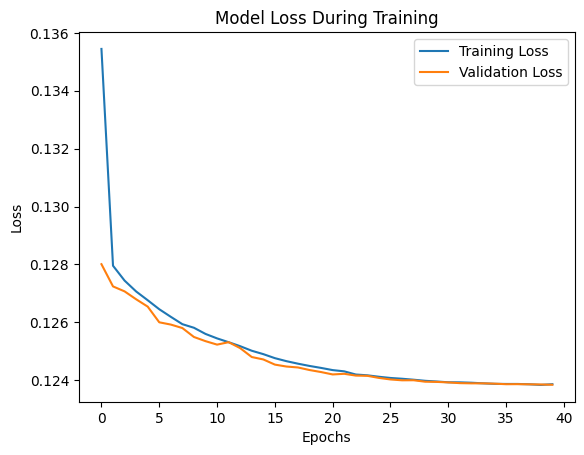

In [124]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Test the Results**

In [125]:
display(model.evaluate([user_vector_train_scaled, anime_vector_train_scaled], y_train_scaled))  # train
display(model.evaluate([user_vector_val_scaled, anime_vector_val_scaled], y_val_scaled))        # val
display(model.evaluate([user_vector_test_scaled, anime_vector_test_scaled], y_test_scaled))     # test

87229/87229 ━━━━━━━━━━━━━━━━━━━━ 84s 968us/step - loss: 0.1237 - root_mean_squared_error: 0.1666


[0.12370677292346954, 0.16659779846668243]

9693/9693 ━━━━━━━━━━━━━━━━━━━━ 9s 917us/step - loss: 0.1241 - root_mean_squared_error: 0.1669


[0.12383998930454254, 0.16663093864917755]

17104/17104 ━━━━━━━━━━━━━━━━━━━━ 16s 959us/step - loss: 0.1240 - root_mean_squared_error: 0.1669


[0.12377776205539703, 0.16659417748451233]

## **Predict 1**

In [126]:
# Cek user ID yang tersedia
available_users = average_user_df_score['user_id'].unique()
print(f"Jumlah user yang tersedia: {len(available_users)}")
print(f"Beberapa contoh user ID: {available_users[:10]}")

# Pilih user ID yang valid (menggunakan ID pertama dari dataset)
user_id = 66
print(f"Menggunakan user ID: {user_id}")

# Ambil data preferensi user
current_user_data = average_user_df_score.loc[average_user_df_score['user_id'] == user_id, :].drop(columns='user_id')
print(f"Ukuran data user: {current_user_data.shape}")

# Duplikasi vektor user sesuai jumlah anime
current_user_vecs = np.tile(current_user_data.to_numpy(), (len(df_anime), 1))
scaled_current_user_vecs = user_scaler.transform(current_user_vecs)
print(f"Ukuran vektor user yang sudah discale: {scaled_current_user_vecs.shape}")

# Ambil vektor anime
anime_vecs = anime_one_hot_df.iloc[:, 1:].to_numpy()
scaled_anime_vecs = anime_scaler.transform(anime_vecs)
print(f"Ukuran vektor anime yang sudah discale: {scaled_anime_vecs.shape}")

# Tampilkan preferensi genre dari user
display(current_user_data)

# Buat prediksi
y_p = model.predict([scaled_current_user_vecs, scaled_anime_vecs])

# Kembalikan ke skala rating asli
y_pu = target_scaler.inverse_transform(y_p)

# Urutkan hasil prediksi dari yang tertinggi
sorted_index = np.argsort(-y_pu, axis=0).reshape(-1)  # Negasi untuk mendapatkan rating tertinggi lebih dulu
sorted_ypu = y_pu[sorted_index].reshape(-1)

# Buat dataframe hasil rekomendasi
result = df_anime.loc[sorted_index, ['Name', 'Genres', 'Score']]
result['Rating_Prediction'] = sorted_ypu

# Tampilkan top 20 rekomendasi
print(f"\nTop 20 Rekomendasi Anime untuk User ID: {user_id}")
display(result.head(20))

Jumlah user yang tersedia: 33538
Beberapa contoh user ID: [-32765 -32763 -32762 -32761 -32759 -32758 -32757 -32756 -32755 -32754]
Menggunakan user ID: 66
Ukuran data user: (1, 22)
Ukuran vektor user yang sudah discale: (24905, 22)
Ukuran vektor anime yang sudah discale: (24905, 27)


,Adventure,Drama,Sports,Award Winning,Comedy,UNKNOWN,Mystery,Ecchi,Horror,Gourmet,...,Avant Garde,Sci-Fi,Action,Fantasy,Hentai,Supernatural,Girls Love,Romance,Boys Love,Slice of Life
11853,7.4,7.3,7.2,7.9,7.3,7.9,7.4,7.0,7.3,7.3,...,7.8,7.2,7.4,7.3,0.0,7.4,7.0,7.2,0.0,6.9


 28/779 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_10']. Received: the structure of inputs=('*', '*')
  warnings.warn(


779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Top 20 Rekomendasi Anime untuk User ID: 66


,Name,Genres,Score,Rating_Prediction
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,8.999913
9854,Koe no Katachi,"Award Winning, Drama",8.94,8.999792
6456,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04,8.999712
5667,Steins;Gate,"Drama, Sci-Fi, Suspense",9.07,8.999688
1431,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi",8.70,8.999560
1822,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi",8.63,8.999472
2647,Code Geass: Hangyaku no Lelouch R2,"Action, Award Winning, Drama, Sci-Fi",8.91,8.999240
16236,Jujutsu Kaisen,"Action, Award Winning, Fantasy",8.64,8.999083
1393,Death Note,"Supernatural, Suspense",8.62,8.999051
11,One Piece,"Action, Adventure, Fantasy",8.69,8.998891


In [127]:
# Filter hasil rekomendasi berdasarkan genre tertentu
genre_filter = "Action"  # Misalnya kita tertarik dengan anime genre Action
filtered_result = result[result['Genres'].str.contains(genre_filter, na=False)]

# Tampilkan hasil yang sudah difilter
print(f"\nTop Rekomendasi Anime dengan Genre {genre_filter} untuk User ID: {user_id}")
display(filtered_result.head(200))


Top Rekomendasi Anime dengan Genre Action untuk User ID: 66


,Name,Genres,Score,Rating_Prediction
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,8.999913
6456,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04,8.999712
1431,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi",8.70,8.999560
1822,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi",8.63,8.999472
2647,Code Geass: Hangyaku no Lelouch R2,"Action, Award Winning, Drama, Sci-Fi",8.91,8.999240
...,...,...,...,...
14811,Doupo Cangqiong 3rd Season,"Action, Adventure, Fantasy, Romance, Supernatural",7.69,7.999442
14817,Mo Dao Zu Shi: Xian Yun Pian,"Action, Adventure, Drama, Fantasy, Mystery",8.41,7.999442
2246,Space Cobra,"Action, Adventure, Sci-Fi",7.66,7.999442
4547,Kidou Senshi Gundam Unicorn,"Action, Drama, Sci-Fi",8.10,7.999442


## **Predict 2**

In [128]:
def sq_dist(a,b):
    """
    Returns the squared distance between two vectors
    Args:
      a (ndarray (n,)): vector with n features
      b (ndarray (n,)): vector with n features
    Returns:
      d (float) : distance
    """
    d = np.sum(np.square(a - b))
    return d

In [129]:
# Mengambil embedding dari anime NN yang memiliki dimensi 10 (sesuai dengan num_outputs di model)
input_anime_t = tf.keras.layers.Input(shape=(anime_vector_train.shape[1],))  # input layer
va_t = anime_NN(input_anime_t)
va_t = L2NormalizeLayer(axis=1)(va_t)  # normalize seperti di model original
model_t = tf.keras.Model(input_anime_t, va_t)
model_t.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 10)             │         4,202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2_normalize_layer              │ (None, 10)             │             0 │
│ (L2NormalizeLayer)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,202 (16.41 KB)

 Trainable params: 4,202 (16.41 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# Ambil data anime dan transform ke format yang sesuai
anime_vecs = anime_one_hot_df.iloc[:, 1:].to_numpy()
scaled_anime_vecs = anime_scaler.transform(anime_vecs)

# Dapatkan representasi anime dari model
vas = model_t.predict(scaled_anime_vecs)
print(f"Ukuran representasi semua anime: {vas.shape}")

779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
Ukuran representasi semua anime: (24905, 10)


In [131]:
count = 50  # jumlah anime yang akan ditampilkan
dim = len(vas)  # jumlah total anime dalam dataset

# Gunakan subset data untuk demonstrasi yang lebih cepat
# Anda bisa menghapus baris ini jika ingin menggunakan seluruh dataset
subset_size = min(1000, dim)  # Batasi ke 1000 anime untuk demonstrasi
vas_subset = vas[:subset_size]
dim = subset_size

print(f"Menggunakan {dim} anime untuk perhitungan kesamaan...")

# Pendekatan vectorized menggunakan numpy untuk menghitung matrix jarak
# Ini jauh lebih cepat daripada menggunakan loop nested
from scipy.spatial.distance import pdist, squareform

# Hitung semua jarak sekaligus menggunakan pdist
# pdist menghitung jarak antara semua pasangan titik dalam matriks
pairwise_dists = pdist(vas_subset, 'sqeuclidean')
dist = squareform(pairwise_dists)  # Ubah ke format matrix

# Masking diagonal
t_dist = np.ma.masked_array(dist, mask=np.identity(dist.shape[0]))

print(f"Ukuran matrix jarak: {dist.shape}")
print(f"Nilai minimum jarak (anime yang paling mirip): {np.min(t_dist)}")
print(f"Nilai maksimum jarak (anime yang paling berbeda): {np.max(t_dist)}")

Menggunakan 1000 anime untuk perhitungan kesamaan...
Ukuran matrix jarak: (1000, 1000)
Nilai minimum jarak (anime yang paling mirip): 0.0
Nilai maksimum jarak (anime yang paling berbeda): 0.831614374074182


In [132]:
# Mendapatkan ID anime pada index tertentu
anime_index = 5  # Contoh: menggunakan index 5
anime_id = df_anime.loc[anime_index, 'anime_id'].item()
print(f"Anime ID pada index {anime_index}: {anime_id}")

Anime ID pada index 5: 15


In [133]:
# Tujuannya adalah mendapatkan 1 anime yang paling mirip dari setiap anime.
header = ["anime1", "genre1", "anime2", "genre2"]
disp = list()
for i in range(count):
    min_idx = np.argmin(t_dist[i])  # Dapatkan index dengan nilai similarity terkecil untuk anime i
    anime1_id = int(df_anime.loc[i, 'anime_id'])  # Dapatkan ID anime asli
    anime2_id = int(df_anime.loc[min_idx, 'anime_id'])  # Dapatkan ID anime yang paling mirip
    
    # Dapatkan informasi nama dan genre untuk kedua anime
    disp.append([
        df_anime.loc[i, 'Name'], 
        df_anime.loc[i, 'Genres'],
        df_anime.loc[min_idx, 'Name'], 
        df_anime.loc[min_idx, 'Genres']
    ])

# Buat dan tampilkan dataframe hasil
disp_df = pd.DataFrame(disp, columns=header)
print("Anime yang Paling Mirip Berdasarkan Fitur:")
display(disp_df)

Anime yang Paling Mirip Berdasarkan Fitur:


,anime1,genre1,anime2,genre2
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",One Piece,"Action, Adventure, Fantasy"
1,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",Tenkuu no Shiro Laputa,"Adventure, Award Winning, Fantasy, Romance, Sc..."
2,Trigun,"Action, Adventure, Sci-Fi",Eyeshield 21,Sports
3,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",Gunsmith Cats,"Action, Comedy"
4,Bouken Ou Beet,"Adventure, Fantasy, Supernatural",Kidou Senshi Victory Gundam,"Drama, Sci-Fi"
5,Eyeshield 21,Sports,Trigun,"Action, Adventure, Sci-Fi"
6,Hachimitsu to Clover,"Comedy, Drama, Romance",Trigun,"Action, Adventure, Sci-Fi"
7,Hungry Heart: Wild Striker,"Comedy, Slice of Life, Sports",Zipang,"Action, Drama, Sci-Fi"
8,Initial D Fourth Stage,"Action, Drama",Trigun,"Action, Adventure, Sci-Fi"
9,Monster,"Drama, Mystery, Suspense",Hajime no Ippo,Sports


In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

def evaluate_recommendation_model(model, user_vector_test_scaled, anime_vector_test_scaled, 
                                  y_test_scaled, target_scaler, threshold=7.0):
    """
    Evaluasi kinerja model rekomendasi anime menggunakan berbagai metrik
    
    Parameters:
    - model: Model Neural Content-Based Filtering yang sudah dilatih
    - user_vector_test_scaled: Vektor user yang sudah di-scale untuk data test
    - anime_vector_test_scaled: Vektor anime yang sudah di-scale untuk data test
    - y_test_scaled: Rating sebenarnya dalam bentuk yang sudah di-scale untuk data test
    - target_scaler: Scaler yang digunakan untuk mengembalikan nilai ke skala asli
    - threshold: Ambang batas untuk klasifikasi rating baik/buruk
    
    Returns:
    - Dictionary berisi berbagai metrik evaluasi
    """
    # Prediksi rating menggunakan model
    y_pred_scaled = model.predict([user_vector_test_scaled, anime_vector_test_scaled])
    
    # Kembalikan ke skala rating asli
    y_true = target_scaler.inverse_transform(y_test_scaled).flatten()
    y_pred = target_scaler.inverse_transform(y_pred_scaled).flatten()
    
    # Konversi rating ke label biner berdasarkan threshold
    actual_labels = (y_true >= threshold).astype(int)
    predicted_labels = (y_pred >= threshold).astype(int)
    
    # Hitung Confusion Matrix
    cm = confusion_matrix(actual_labels, predicted_labels)
    
    # Hitung metrik klasifikasi
    if len(cm.ravel()) == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle jika confusion matrix tidak 2x2
        print("Warning: Confusion matrix tidak berukuran 2x2")
        tn, fp, fn, tp = 0, 0, 0, 0
    
    # Metrik detail
    accuracy = accuracy_score(actual_labels, predicted_labels)
    
    # Tangani kasus khusus untuk precision, recall, f1
    try:
        precision = precision_score(actual_labels, predicted_labels)
        recall = recall_score(actual_labels, predicted_labels)
        f1 = f1_score(actual_labels, predicted_labels)
    except Exception as e:
        print(f"Warning calculating metrics: {e}")
        precision, recall, f1 = 0, 0, 0
    
    # Hitung Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    
    # Hitung Mean Absolute Error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Hitung metrik additional yang relevan untuk sistem rekomendasi
    # Mean Percentage Error (MPE)
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    
    return {
        'confusion_matrix': cm,
        'true_positive': tp,
        'true_negative': tn,
        'false_positive': fp,
        'false_negative': fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'rmse': rmse,
        'mae': mae,
        'mpe': mpe
    }

# Fungsi untuk mencetak hasil evaluasi secara detail
def print_evaluation_results(eval_results):
    print("\n--- Hasil Evaluasi Model Neural Content-Based Filtering ---")
    print("\nConfusion Matrix:")
    print(eval_results['confusion_matrix'])
    
    print("\nMetrik Klasifikasi:")
    print(f"Accuracy     : {eval_results['accuracy']:.4f}")
    print(f"Precision    : {eval_results['precision']:.4f}")
    print(f"Recall       : {eval_results['recall']:.4f}")
    print(f"F1-Score     : {eval_results['f1_score']:.4f}")
    
    print("\nMetrik Error:")
    print(f"RMSE         : {eval_results['rmse']:.4f}")
    print(f"MAE          : {eval_results['mae']:.4f}")
    print(f"MPE (%)      : {eval_results['mpe']:.4f}")
    
    print("\nKomponen Confusion Matrix:")
    print(f"True Positive  : {eval_results['true_positive']}")
    print(f"True Negative  : {eval_results['true_negative']}")
    print(f"False Positive : {eval_results['false_positive']}")
    print(f"False Negative : {eval_results['false_negative']}")

# Evaluasi untuk Neural Content-Based Filtering dengan berbagai threshold
thresholds = [6.5, 7.0, 8.0]

for threshold in thresholds:
    print(f"\n=== Evaluasi dengan Threshold {threshold} ===")
    neural_content_based_eval = evaluate_recommendation_model(
        model=model,
        user_vector_test_scaled=user_vector_test_scaled, 
        anime_vector_test_scaled=anime_vector_test_scaled,
        y_test_scaled=y_test_scaled,
        target_scaler=target_scaler,
        threshold=threshold
    )
    print_evaluation_results(neural_content_based_eval)


=== Evaluasi dengan Threshold 6.5 ===
17104/17104 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step

--- Hasil Evaluasi Model Neural Content-Based Filtering ---

Confusion Matrix:
[[ 16247 111261]
 [  8400 411409]]

Metrik Klasifikasi:
Accuracy     : 0.7814
Precision    : 0.7871
Recall       : 0.9800
F1-Score     : 0.8730

Metrik Error:
RMSE         : 1.4993
MAE          : 1.1118
MPE (%)      : -9.3101

Komponen Confusion Matrix:
True Positive  : 411409
True Negative  : 16247
False Positive : 111261
False Negative : 8400

=== Evaluasi dengan Threshold 7.0 ===
17104/17104 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step

--- Hasil Evaluasi Model Neural Content-Based Filtering ---

Confusion Matrix:
[[ 49784  77724]
 [ 56151 363658]]

Metrik Klasifikasi:
Accuracy     : 0.7554
Precision    : 0.8239
Recall       : 0.8662
F1-Score     : 0.8445

Metrik Error:
RMSE         : 1.4993
MAE          : 1.1118
MPE (%)      : -9.3101

Komponen Confusion Matrix:
True Positive  : 363658
True Negative  : 49784
False Positive : 77724

## **Save Model**

In [138]:
# Save model to h5 file
model.save('content_based.h5')

In [139]:
# Check loaded model
new_model = tf.keras.models.load_model('content_based.h5')

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_45>',)
  • kwargs={'mask': 'None'}

In [140]:
# Evaluasi model pada data anime
# Check loaded model
print("Evaluasi Model:")
print("Training Set:")
display(new_model.evaluate([user_vector_train_scaled, anime_vector_train_scaled], y_train_scaled))  # train

print("Validation Set:")
display(new_model.evaluate([user_vector_val_scaled, anime_vector_val_scaled], y_val_scaled))        # val

print("Test Set:")
display(new_model.evaluate([user_vector_test_scaled, anime_vector_test_scaled], y_test_scaled))     # test

Evaluasi Model:
Training Set:


NameError: name 'new_model' is not defined